<h1>TP 4 : Travail de recherche<h1>                          
<h2>Traitement et resolution du problème de classification déséquilibrée en machine learning 
    (Imbalanced classification problem)<h2>

In [166]:
churn = read.csv2("Churn.csv",header=TRUE)

In [167]:
str(churn)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

In [168]:
summary(churn)

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             

In [169]:
#Écarter les observations ayant des valeurs manquantes
churn_complete <- na.omit(churn)

In [170]:
str(churn_complete)

'data.frame':	7032 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

**apres qu'on a écarter les observations ayant des valeurs manquantes on a obtenu 7032 observation au lieu de 7043**

In [174]:
churn_complete$SeniorCitizen

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  [75] 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 [112] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 [260] 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 [297] 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0
 [334] 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 [408] 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [445] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 [482] 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1
 [519] 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1
 [630] 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 [704] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 [741] 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [815] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 [889] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 [926] 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 [963] 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
[1000] 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
[1037] 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[1074] 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
[1185] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
[1259] 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
[1296] 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
[1407] 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
[1444] 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
[1481] 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
[1592] 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0
[1629] 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[1666] 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[1703] 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0
[1777] 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
[1814] 0 0 0 1 0 0 0 0 0 0 0 0 0 1

In [175]:
#Changer le type de SeniorCitizen à « Factor »
churn_complete$SeniorCitizen <- factor(churn_complete$SeniorCitizen, levels=c(0,1),labels = c("No","Yes"))

In [176]:
churn_complete$SeniorCitizen

[1] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
  [19] No  No  Yes No  No  No  No  No  No  No  No  No  Yes Yes No  No  Yes No 
  [37] No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No  Yes Yes
  [55] Yes Yes No  Yes No  No  No  No  No  No  No  No  No  No  No  No  No  No 
  [73] Yes No  No  Yes No  No  Yes No  No  No  No  No  No  No  No  No  No  No 
  [91] No  Yes No  No  No  No  No  No  No  Yes No  No  No  Yes No  No  No  No 
 [109] No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No  No 
 [127] Yes No  No  Yes No  No  No  No  No  No  No  No  No  Yes Yes No  No  No 
 [145] Yes No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [163] No  No  No  No  No  No  Yes No  No  No  No  No  No  No  Yes Yes No  No 
 [181] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [199] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No 
 [217] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [235] No  No  No  No  Yes No  No  No  No  Yes Yes Yes No  Yes No  No  No  No 
 [253] Yes No  No  No  No  No  No  Yes Yes Yes Yes No  No  No  No  Yes No  No 
 [271] Yes No  No  Yes No  No  No  Yes No  No  No  No  No  No  No  No  No  No 
 [289] Yes No  Yes No  No  Yes No  No  No  Yes No  No  No  Yes No  No  No  No 
 [307] Yes No  Yes No  No  No  No  Yes No  No  No  No  Yes No  Yes No  No  No 
 [325] No  No  Yes Yes Yes Yes No  No  No  No  No  No  No  No  No  No  Yes No 
 [343] No  No  No  Yes No  No  No  Yes No  No  Yes No  Yes No  Yes No  Yes No 
 [361] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [379] No  No  No  No  Yes No  No  Yes Yes No  No  No  No  Yes Yes No  Yes No 
 [397] Yes No  Yes No  No  No  No  No  No  No  No  Yes No  No  Yes No  No  No 
 [415] Yes No  No  No  No  Yes No  No  No  No  No  Yes Yes No  No  No  No  No 
 [433] No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No 
 [451] No  Yes No  No  No  No  No  No  No  No  No  No  No  No  Yes No  Yes No 
 [469] No  No  Yes No  No  No  No  No  Yes No  No  No  No  No  Yes No  No  No 
 [487] No  No  No  No  No  No  Yes No  No  No  No  Yes No  No  Yes No  No  No 
 [505] Yes No  No  No  No  Yes No  Yes No  No  No  No  Yes Yes No  No  Yes No 
 [523] No  No  No  Yes No  No  Yes No  No  No  Yes No  No  No  No  No  No  No 
 [541] No  No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No 
 [559] No  No  No  No  No  No  No  No  No  No  No  No  Yes No  No  Yes No  No 
 [577] No  Yes No  No  No  Yes No  No  Yes No  No  No  No  No  No  No  No  No 
 [595] No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No 
 [613] Yes No  No  No  Yes No  No  Yes No  No  No  No  No  No  Yes Yes Yes Yes
 [631] No  No  No  No  No  No  No  Yes No  No  No  No  Yes No  Yes No  No  Yes
 [649] Yes No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No  No 
 [667] No  No  No  No  No  No  No  Yes Yes No  No  No  No  No  No  No  Yes No 
 [685] No  No  Yes No  No  No  No  No  No  Yes No  No  No  Yes No  No  No  No 
 [703] No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No  Yes No 
 [721] No  No  No  Yes Yes No  No  Yes No  No  No  No  No  No  No  No  No  Yes
 [739] Yes No  No  No  No  No  Yes Yes Yes No  No  No  No  No  No  Yes No  No 
 [757] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [775] No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No 
 [793] No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No 
 [811] No  No  Yes No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No 
 [829] No  No  No  No  Yes Yes No  No  No  No  Yes No  No  No  No  No  No  No 
 [847] No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No 
 [865] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No  No 
 [883] No  No  Yes Yes No  No  No  No  Yes No  No  No  No  No  No  No  No  No 
 [901] No  No  No  Yes No  No  No  No  Yes Yes No  No

Il est préférable d’écarter la variable customerID lors de la création des échantillons

In [177]:
churn_complete <- churn_complete[,-1]
str (churn_complete)

'data.frame':	7032 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No int

On divise le dataset en deux échantillons: apprentissage et test

In [178]:
library(caret)

indiceApprentisage <- createDataPartition(churn_complete$Churn,p=0.7,list=FALSE)
churn_Apprentissage <- churn_complete[indiceApprentisage,]
churn_test <- churn_complete[-indiceApprentisage,]
nrow(churn_complete)

[1] 7032

In [179]:
nrow(churn_Apprentissage)

[1] 4924

In [180]:
nrow(churn_test)

[1] 2108

In [181]:
<h2>RPART<h2>

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '<'
1: <
    ^


In [182]:
library(rpart)

In [183]:
rpart_churn <- rpart(Churn~., method="class",data=churn_Apprentissage)

<h4>Tester le modèle sur l’échantillon test<h4>

In [184]:

churn_prediction <- predict(rpart_churn,churn_test,type="class")
table(predict=churn_prediction,Réel=churn_test$Churn)

       Réel
predict   No  Yes
    No  1447  345
    Yes  101  215

<h2> Calculer la précision du modèle<h2>

In [185]:
tab <- table(churn_prediction,churn_test$Churn)
accuracy <- sum(diag(tab))/sum(tab)
accuracy

[1] 0.788425

<h3>Afficher la matrice de confusion<h3>

In [186]:
install.packages('e1071', dependencies=TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [187]:
confusionMatrix(churn_prediction,churn_test$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1447  345
       Yes  101  215
                                          
               Accuracy : 0.7884          
                 95% CI : (0.7704, 0.8057)
    No Information Rate : 0.7343          
    P-Value [Acc > NIR] : 5.067e-09       
                                          
                  Kappa : 0.3702          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9348          
            Specificity : 0.3839          
         Pos Pred Value : 0.8075          
         Neg Pred Value : 0.6804          
             Prevalence : 0.7343          
         Detection Rate : 0.6864          
   Detection Prevalence : 0.8501          
      Balanced Accuracy : 0.6593          
                                          
       'Positive' Class : No              
                        

In [111]:
?confusionMatrix

<h1> Random Forest <h1>

In [188]:
library(randomForest)

Créer le modèle avec la fonction randomForest
print('fait')

In [189]:
rf_churn <- randomForest(Churn~.,data=churn_Apprentissage)

<h3>Tester le modèle sur l’échantillon de test<h3>

In [190]:
churn_prediction_rf <- predict(rf_churn,churn_test)

In [191]:
confusionMatrix(churn_prediction_rf,churn_test$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1388  278
       Yes  160  282
                                          
               Accuracy : 0.7922          
                 95% CI : (0.7743, 0.8094)
    No Information Rate : 0.7343          
    P-Value [Acc > NIR] : 4.020e-10       
                                          
                  Kappa : 0.4291          
                                          
 Mcnemar's Test P-Value : 2.264e-08       
                                          
            Sensitivity : 0.8966          
            Specificity : 0.5036          
         Pos Pred Value : 0.8331          
         Neg Pred Value : 0.6380          
             Prevalence : 0.7343          
         Detection Rate : 0.6584          
   Detection Prevalence : 0.7903          
      Balanced Accuracy : 0.7001          
                                          
       'Positive' Class : No              
                        

<h3>Dans l'ensemble de données Churn, la grande majorité des observations appartiennent à la même classe qui ce qui affecte notre modèle et le rendre peu intelligent et par consequent prédira toujours la classe dominante.<h3>

In [192]:
prop.table(table(churn_Apprentissage$Churn))


       No       Yes 
0.7341592 0.2658408 

<h1>Stratégies d’échantillonnage<h1>

Une technique consiste tout simplement à rééquilibrer votre jeu de données. Soit en faisant de l’**undersampling**, en enlevant des données de la classe majoritaire, soit en faisant de l’**oversampling**, en rajoutant des nouvelles données dans la classe minoritaire.

<h2> undersampling <h2>

On a choisi la Strategie d'echantillonnage undersampling,tous simplement par ce que c'est plus simple 
de supprimer des données que d’en rajouter.

Mais aussi on a des avantages par ce que le sous-échantillonnage peut aider à améliorer le temps d'exécution et les problèmes de stockage en réduisant le nombre d'échantillons de données de formation lorsque l'ensemble de données de formation est énorme.

Mais attention on peut perdre des informations utiles et biaisé notre modele.

In [193]:
prop.table(table(churn_complete$Churn))


      No      Yes 
0.734215 0.265785 

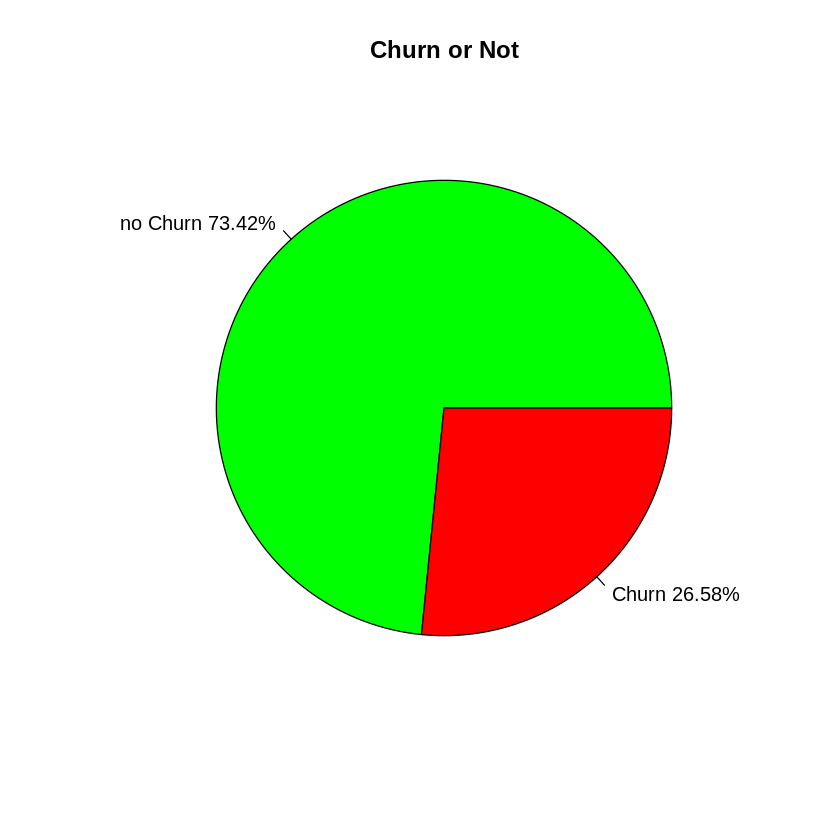

In [194]:
labels <- c("no Churn", "Churn")
labels <- paste(labels, round(100*prop.table(table(churn_complete$Churn)), 2))
labels <- paste0(labels, "%")
pie(table(churn_complete$Churn),labels,col=c("green","red"),main = "Churn or Not")

In [195]:
prop.table(table(churn_Apprentissage$Churn))


       No       Yes 
0.7341592 0.2658408 

In [196]:
install.packages("doParallel")
install.packages("ROSE")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [197]:
library(doParallel)
library(ROSE)


In [198]:
churn_under <- ovun.sample(Churn~., data=churn_Apprentissage, method="under", N=2618)$data
table(churn_under$Churn)


  No  Yes 
1309 1309 

In [199]:
prop.table(table(churn_under$Churn))


 No Yes 
0.5 0.5 

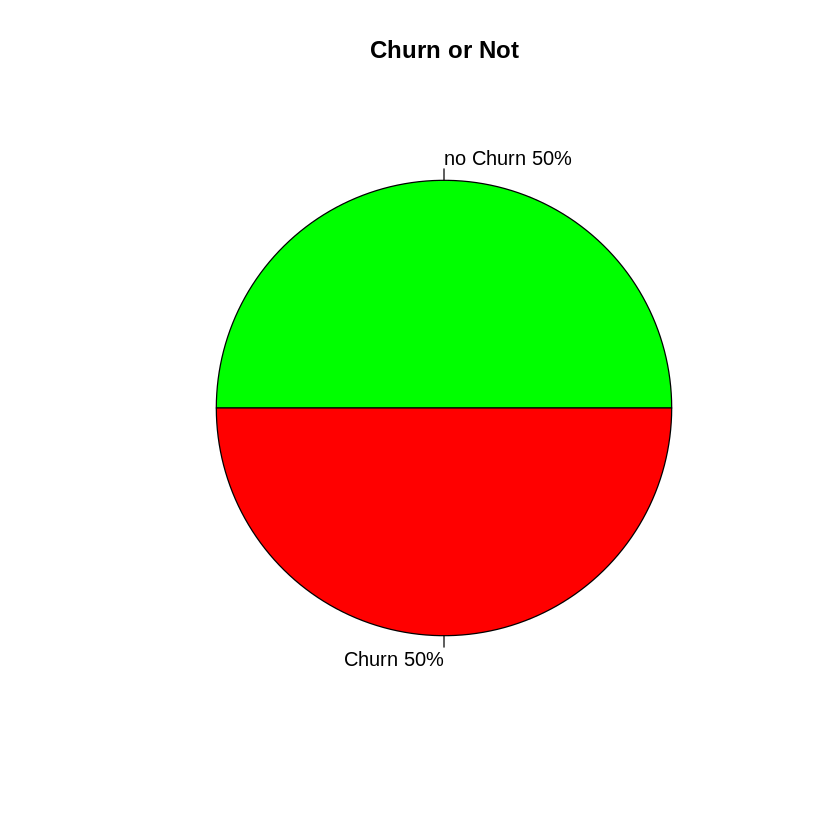

In [200]:
labels <- c("no Churn", "Churn")
labels <- paste(labels, round(100*prop.table(table(churn_under$Churn)), 2))
labels <- paste0(labels, "%")
pie(table(churn_under$Churn),labels,col=c("green","red"),main = "Churn or Not")

In [201]:
summary(churn_under)

    gender     SeniorCitizen Partner    Dependents     tenure      PhoneService
 Female:1321   No :2121      No :1456   No :1923   Min.   : 1.00   No : 257    
 Male  :1297   Yes: 497      Yes:1162   Yes: 695   1st Qu.: 5.00   Yes:2361    
                                                   Median :21.00               
                                                   Mean   :27.57               
                                                   3rd Qu.:48.75               
                                                   Max.   :72.00               
          MultipleLines     InternetService             OnlineSecurity
 No              :1264   DSL        : 819   No                 :1522  
 No phone service: 257   Fiber optic:1351   No internet service: 448  
 Yes             :1097   No         : 448   Yes                : 648  
                                                                      
                                                                      
              

<h2>rpart<h2>

In [202]:
indiceApprentisage <- createDataPartition(churn_under$Churn,p=0.7,list=FALSE)
churn_Apprentissage <- churn_complete[indiceApprentisage,]
churn_test <- churn_under[-indiceApprentisage,]
prop.table(table(churn_Apprentissage$Churn))

#ici normalement on doit pas avoir ce desiquilibrage


       No       Yes 
0.7464558 0.2535442 

In [203]:
rpart_churn <- rpart(Churn~., method="class",data=churn_Apprentissage)

In [204]:
churn_prediction <- predict(rpart_churn,churn_test,type="class")
table(predict=churn_prediction,Réel=churn_test$Churn)

       Réel
predict  No Yes
    No  360 197
    Yes  32 195

In [205]:
tab <- table(churn_prediction,churn_test$Churn)
accuracy <- sum(diag(tab))/sum(tab)
accuracy

[1] 0.7079082

In [206]:
confusionMatrix(churn_prediction,churn_test$Churn)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  360 197
       Yes  32 195
                                          
               Accuracy : 0.7079          
                 95% CI : (0.6747, 0.7395)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4158          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9184          
            Specificity : 0.4974          
         Pos Pred Value : 0.6463          
         Neg Pred Value : 0.8590          
             Prevalence : 0.5000          
         Detection Rate : 0.4592          
   Detection Prevalence : 0.7105          
      Balanced Accuracy : 0.7079          
                                          
       'Positive' Class : No              
                              

<h3>randomForest<h3>

In [207]:
library(randomForest)
rf_churn <- randomForest(Churn~.,data=churn_Apprentissage)
churn_prediction_rf <- predict(rf_churn,churn_test)
confusionMatrix(churn_prediction_rf,churn_test$Churn)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  357 157
       Yes  35 235
                                          
               Accuracy : 0.7551          
                 95% CI : (0.7234, 0.7848)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5102          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9107          
            Specificity : 0.5995          
         Pos Pred Value : 0.6946          
         Neg Pred Value : 0.8704          
             Prevalence : 0.5000          
         Detection Rate : 0.4554          
   Detection Prevalence : 0.6556          
      Balanced Accuracy : 0.7551          
                                          
       'Positive' Class : No              
                              

**On remarque que la prévision de notre modèle a été augmenté en utilisant undersampling avec randomForest
mais par contre rpart a ffaibli notre précision**

<h2>oversampling<h2>

**Les avantages**
Contrairement au sous-échantillonnage, cette méthode n'entraîne aucune perte d'informations.
Surperforme sous échantillonnage.

**les inconvénients**
Il augmente la probabilité de sur-ajustement car il reproduit les événements de classe minoritaire.
 

In [208]:
install.packages("doParallel")
install.packages("ROSE")
library(doParallel)
library(ROSE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


initialisation des indice d'apprentissage

In [209]:

indiceApprentisage <- createDataPartition(churn_complete$Churn,p=0.7,list=FALSE)
churn_Apprentissage <- churn_complete[indiceApprentisage,]
churn_test <- churn_complete[-indiceApprentisage,]
nrow(churn_complete)

[1] 7032

In [210]:
churn_over <- ROSE::ovun.sample(Churn~., data=churn_Apprentissage, method="over", N=7230)$data
table(churn_over$Churn)



  No  Yes 
3615 3615 

In [211]:
summary(churn_over)
#Apres l’exécution de la commande rose, on remarque qu'on a des nouveaux données ajoutés ,
#aussi on remarque que l'intervale ontre le min et le max a eté changé

    gender     SeniorCitizen Partner    Dependents     tenure      PhoneService
 Female:3614   No :5839      No :4006   No :5339   Min.   : 1.00   No : 644    
 Male  :3616   Yes:1391      Yes:3224   Yes:1891   1st Qu.: 5.00   Yes:6586    
                                                   Median :22.00               
                                                   Mean   :28.01               
                                                   3rd Qu.:50.00               
                                                   Max.   :72.00               
          MultipleLines     InternetService             OnlineSecurity
 No              :3451   DSL        :2197   No                 :4226  
 No phone service: 644   Fiber optic:3818   No internet service:1215  
 Yes             :3135   No         :1215   Yes                :1789  
                                                                      
                                                                      
              

<h3>Rpart<h3>

In [212]:
rpart_churn <- rpart(Churn~., method="class",data=churn_over)

In [213]:
churn_prediction <- predict(rpart_churn,churn_test,type="class")
table(predict=churn_prediction,Réel=churn_test$Churn)

       Réel
predict   No  Yes
    No  1133  133
    Yes  415  427

In [214]:
tab <- table(churn_prediction,churn_test$Churn)
accuracy <- sum(diag(tab))/sum(tab)
accuracy

[1] 0.740038

In [215]:
confusionMatrix(churn_prediction,churn_test$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1133  133
       Yes  415  427
                                          
               Accuracy : 0.74            
                 95% CI : (0.7208, 0.7587)
    No Information Rate : 0.7343          
    P-Value [Acc > NIR] : 0.2862          
                                          
                  Kappa : 0.426           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7319          
            Specificity : 0.7625          
         Pos Pred Value : 0.8949          
         Neg Pred Value : 0.5071          
             Prevalence : 0.7343          
         Detection Rate : 0.5375          
   Detection Prevalence : 0.6006          
      Balanced Accuracy : 0.7472          
                                          
       'Positive' Class : No              
                        

<h3>randomForest<h3>

In [216]:

rf_churn <- randomForest(Churn~.,data=churn_over)
churn_prediction_rf <- predict(rf_churn,churn_test)
confusionMatrix(churn_prediction_rf,churn_test$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1278  219
       Yes  270  341
                                          
               Accuracy : 0.768           
                 95% CI : (0.7494, 0.7859)
    No Information Rate : 0.7343          
    P-Value [Acc > NIR] : 0.0002138       
                                          
                  Kappa : 0.4222          
                                          
 Mcnemar's Test P-Value : 0.0237544       
                                          
            Sensitivity : 0.8256          
            Specificity : 0.6089          
         Pos Pred Value : 0.8537          
         Neg Pred Value : 0.5581          
             Prevalence : 0.7343          
         Detection Rate : 0.6063          
   Detection Prevalence : 0.7102          
      Balanced Accuracy : 0.7173          
                                          
       'Positive' Class : No              
                        

**Nous remarquons que l'algorithme oversampling a affaibli notre précision.**

<h2> Strategie Algorithmique - Random Forest avec ajustement des parametres<h2>

Nous avons vu comment adapter nos données à nos modèles mais il est également possible de faire l’inverse et d’adapter nos modèles à nos données !

Les meilleurs algorithmes pour traiter ce genre de problème sont les algorithmes de Boosting. Pour rappel, le principe du Boosting est de créer de manière itérative une succession d’arbres de décision dont chaque arbre va prédire l’erreur du précédent. Etant donné que les erreurs vont se concentrer principalement sur les classes minoritaires, les arbres vont par conséquent peu à peu se focaliser exclusivement sur la prédiction de ces cas marginaux.